In [306]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [310]:
import random
import re

mat_dir = "/fast_storage/intern/data/instruction_tuning/oasis3_longitudinal_mat/train"

mat_files = list(Path(mat_dir).glob("*.mat"))
print(f"Found {len(mat_files)} .mat files")

if mat_files:
    mat_file_path = random.choice(mat_files)
    print(f"Selected file: {mat_file_path.name}")
    
    match = re.search(r'_(d\d+)_to_(d\d+)_', mat_file_path.name)
    src_ses = match.group(1)
    tgt_ses = match.group(2)
    print(f"Source session: {src_ses}, Target session: {tgt_ses}")

    mat_data = sio.loadmat(mat_file_path)
    
    print("Available keys:", mat_data.keys())
    
    image = mat_data['image']
    label = mat_data['label']
    text = mat_data['text']
    
    print(f"Image shape: {image.shape}")
    print(f"Label shape: {label.shape}")
else:
    print("No .mat files found in the directory")

Found 6832 .mat files
Selected file: OAS30552_T1w_d0139_to_d1011_slice119.mat
Source session: d0139, Target session: d1011
Available keys: dict_keys(['__header__', '__version__', '__globals__', 'image', 'label', 'instruction', 'text'])
Image shape: (176, 256)
Label shape: (176, 256)


Selected file: OAS30978_T1w_d0041_to_d1207_slice141.mat
21.20492276278409


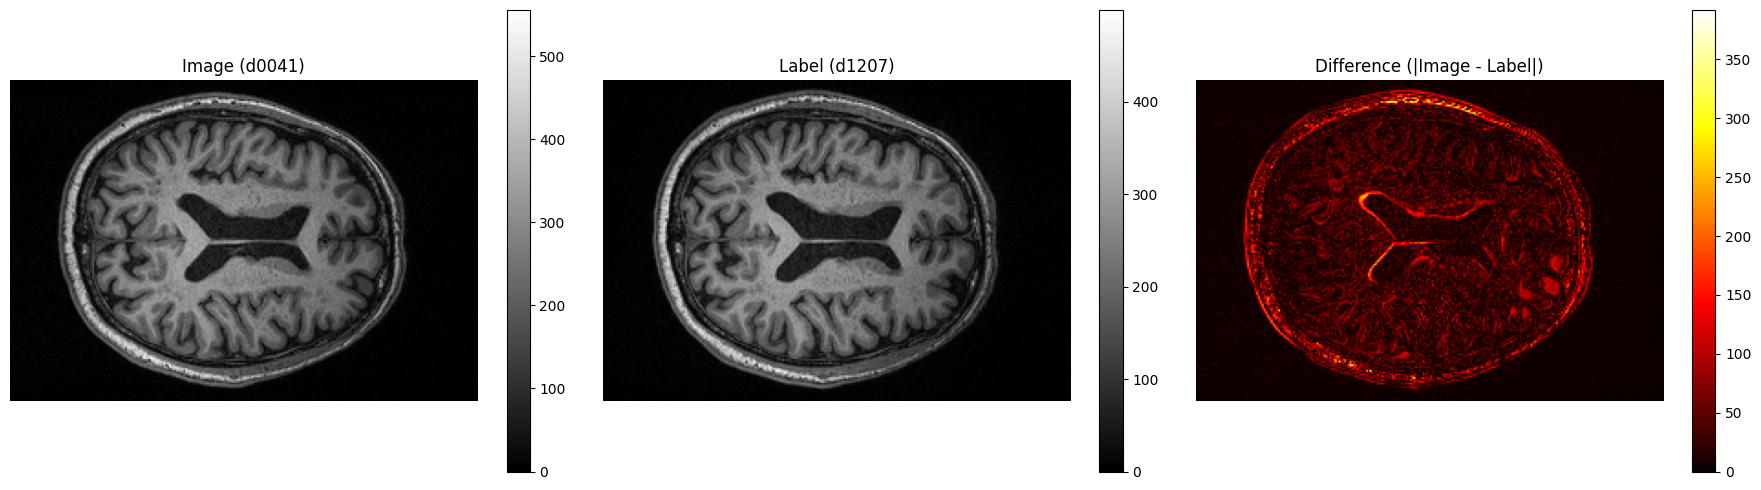

[[array(['Forecast how this MRI slice will look after 1166 days.'],
        dtype='<U54')                                              ]]
[[array(['{\n    "Modality": "MR",\n    "MagneticFieldStrength": 3,\n    "Manufacturer": "Siemens",\n    "ManufacturersModelName": "TrioTim",\n    "DeviceSerialNumber": "35177",\n    "BodyPartExamined": "HEAD",\n    "PatientPosition": "HFS",\n    "SoftwareVersions": "syngo_MR_B17",\n    "MRAcquisitionType": "3D",\n    "SeriesDescription": "t1_mpr_1mm_p2_pos50",\n    "ScanningSequence": "GR_IR",\n    "SequenceVariant": "SP_MP_OSP",\n    "ScanOptions": "IR",\n    "SequenceName": "tfl3d1_ns",\n    "ImageType": [\n        "ORIGINAL",\n        "PRIMARY",\n        "M",\n        "ND",\n        "NORM"\n    ],\n    "AcquisitionTime": "14:07:9.605000",\n    "AcquisitionNumber": 1,\n    "SliceThickness": 1,\n    "SAR": 0.0821202,\n    "EchoTime": 0.00316,\n    "RepetitionTime": 2.4,\n    "InversionTime": 1,\n    "FlipAngle": 8,\n    "PartialFourier": 1,\n    "B

In [314]:
import matplotlib.gridspec as gridspec

import random
import re

mat_dir = "/fast_storage/intern/data/instruction_tuning/oasis3_longitudinal_mat/train"

mat_files = list(Path(mat_dir).glob("*.mat"))

if mat_files:
    mat_file_path = random.choice(mat_files)
    print(f"Selected file: {mat_file_path.name}")
    
    match = re.search(r'_(d\d+)_to_(d\d+)_', mat_file_path.name)
    src_ses = match.group(1)
    tgt_ses = match.group(2)

    mat_data = sio.loadmat(mat_file_path)
    
    image = mat_data['image']
    label = mat_data['label']
    instruction = mat_data['instruction']
    text = mat_data['text']
    
fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 3)

# Image 시각화
ax1 = plt.subplot(gs[0])
ax1.imshow(image, cmap='gray')
ax1.set_title(f'Image ({src_ses})')
plt.colorbar(ax1.images[0], ax=ax1)
ax1.axis('off')

# Label 시각화
ax2 = plt.subplot(gs[1])
ax2.imshow(label, cmap='gray')
ax2.set_title(f'Label ({tgt_ses})')
plt.colorbar(ax2.images[0], ax=ax2)
ax2.axis('off')

# Difference 시각화
ax3 = plt.subplot(gs[2])
difference = np.abs(image.astype(float) - label.astype(float))
im = ax3.imshow(difference, cmap='hot')
print(np.mean(difference))
ax3.set_title('Difference (|Image - Label|)')
plt.colorbar(im, ax=ax3)
ax3.axis('off')

plt.tight_layout()
plt.show()

print(instruction)
print(text[:50])

# Text 표시 - 긴 텍스트를 보기 좋게 표시
# ax3 = plt.subplot(gs[2])
# text_str = str(text).replace('\\n', '\n')  # 줄바꿈 처리
# max_len = 500
# if len(text_str) > max_len:
#     text_str = text_str[:max_len] + '\n...(truncated)'

# ax3.text(0.05, 0.95, text_str, 
#          ha='left', va='top', fontsize=12, 
#          family='monospace',
#          bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
# ax3.set_xlim(0, 1)
# ax3.set_ylim(0, 1)
# ax3.axis('off')
# ax3.set_title('Text')



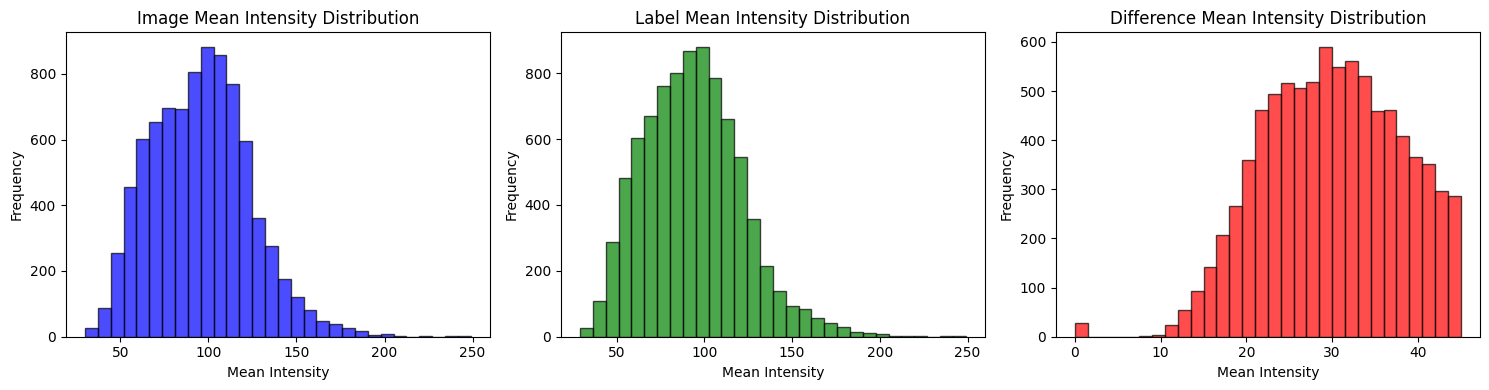

Total slices processed: 8538
Image mean intensity: 95.6082 ± 28.0391
Label mean intensity: 93.3210 ± 28.1976
Difference mean intensity: 29.9588 ± 7.9573


In [303]:
import os

# 모든 .mat 파일에 대해 intensity 평균값 수집
image_means = []
label_means = []
difference_means = []

for mat_file in mat_files:
    mat_data = sio.loadmat(mat_file)
    image = mat_data['image']
    label = mat_data['label']
    
    image_means.append(np.mean(image))
    label_means.append(np.mean(label))
    difference = np.abs(image.astype(float) - label.astype(float))
    difference_means.append(np.mean(difference))

# 히스토그램 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(image_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Image Mean Intensity Distribution')
axes[0].set_xlabel('Mean Intensity')
axes[0].set_ylabel('Frequency')

axes[1].hist(label_means, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Label Mean Intensity Distribution')
axes[1].set_xlabel('Mean Intensity')
axes[1].set_ylabel('Frequency')

axes[2].hist(difference_means, bins=30, alpha=0.7, color='red', edgecolor='black')
axes[2].set_title('Difference Mean Intensity Distribution')
axes[2].set_xlabel('Mean Intensity')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Total slices processed: {len(image_means)}")
print(f"Image mean intensity: {np.mean(image_means):.4f} ± {np.std(image_means):.4f}")
print(f"Label mean intensity: {np.mean(label_means):.4f} ± {np.std(label_means):.4f}")
print(f"Difference mean intensity: {np.mean(difference_means):.4f} ± {np.std(difference_means):.4f}")